A typical digital image is made by stacking Red Blue and Green pixel arrays of intensities ranging from 0 to 255.

<img src="img/RGB.png">

A grayscale image does not contain color but only shades of gray. The pixel intensity in a grayscale image varies from black (0 intensity) to white (255 full intensity) to make it what we usually call as a Black & White image.

Digits dataset is a grayscale image dataset of handwritten digit having 1797 8×8 images.

In [1]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
 
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [2]:
data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

sklearn.datasets module makes it quick to import digits data by importing load_digits class from it. The shape of the digit data is (1797, 64). 8×8 pixels are flattened to create a vector of length 64 for every image.

In [3]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[0,:].reshape(8,8)
image_sample

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits.data.shape

(1797, 64)

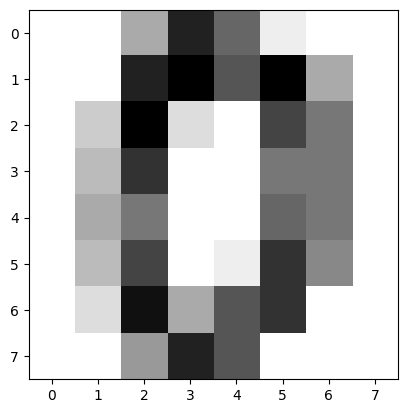

In [5]:
plt.imshow(image_sample, cmap='binary')

Now, using PCA, let’s reduce the image dimensions from 64 to just 2 so that we can visualize the dataset using a Scatterplot.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(2)
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 2)

We can also pass a float value less than 1 instead of an integer number. i.e. PCA(0.90) this means the algorithm will find the principal components which explain 90% of the variance in data.

C:\Users\hegoi\AppData\Local\Temp\ipykernel_17584\4166187254.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


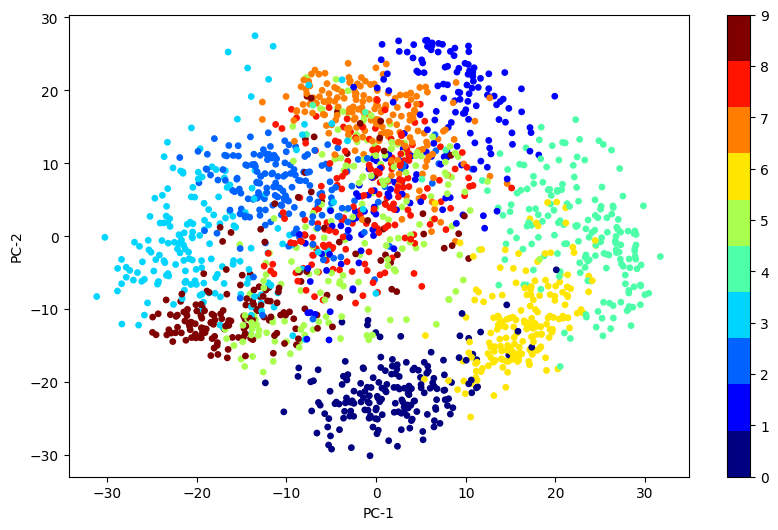

In [8]:
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show();

Another cool application of PCA is in Image compression. Let’s have a look at how can we achieve this with python.

In [12]:
#!pip install opencv-python

In [13]:
# Importing required libraries
import cv2
import numpy as np
from sklearn.decomposition import PCA

In [14]:
# Loading the image 
img = cv2.imread('img/my_doggo_sample.jpeg')

In [15]:
img[0].shape

(1280, 3)

In [16]:
img

array([[[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [192, 216, 246],
        [193, 217, 248],
        [193, 217, 248]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [191, 215, 245],
        [192, 216, 246],
        [192, 216, 246]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [189, 213, 243],
        [190, 214, 244],
        [190, 214, 244]],

       ...,

       [[ 47,  63,  76],
        [ 30,  45,  56],
        [ 47,  63,  69],
        ...,
        [ 26,  51,  77],
        [ 29,  55,  79],
        [ 50,  76, 100]],

       [[ 46,  62,  75],
        [ 18,  35,  46],
        [ 29,  45,  52],
        ...,
        [ 40,  67,  95],
        [ 40,  68,  93],
        [ 48,  77, 100]],

       [[ 32,  48,  61],
        [ 17,  34,  45],
        [ 20,  36,  42],
        ...,
        [ 47,  74, 102],
        [ 43,  73,  98],
        [ 48,  79, 103]]

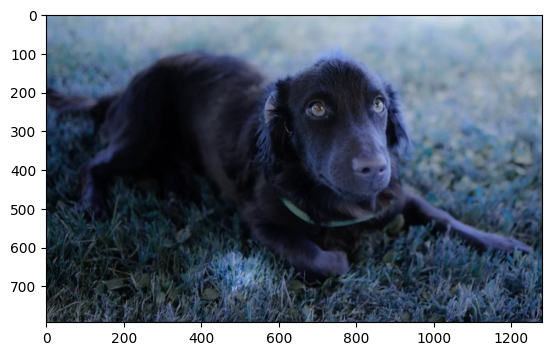

In [17]:
plt.imshow(img);

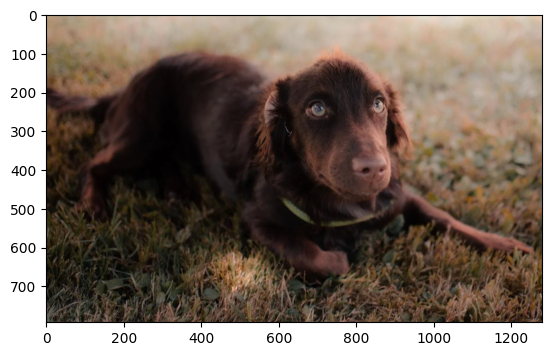

In [18]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image);

In [19]:
img.shape

(793, 1280, 3)

In [20]:
img.size

3045120

In [21]:
793*1280

1015040

In [22]:
img

array([[[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [192, 216, 246],
        [193, 217, 248],
        [193, 217, 248]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [191, 215, 245],
        [192, 216, 246],
        [192, 216, 246]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [189, 213, 243],
        [190, 214, 244],
        [190, 214, 244]],

       ...,

       [[ 47,  63,  76],
        [ 30,  45,  56],
        [ 47,  63,  69],
        ...,
        [ 26,  51,  77],
        [ 29,  55,  79],
        [ 50,  76, 100]],

       [[ 46,  62,  75],
        [ 18,  35,  46],
        [ 29,  45,  52],
        ...,
        [ 40,  67,  95],
        [ 40,  68,  93],
        [ 48,  77, 100]],

       [[ 32,  48,  61],
        [ 17,  34,  45],
        [ 20,  36,  42],
        ...,
        [ 47,  74, 102],
        [ 43,  73,  98],
        [ 48,  79, 103]]

In [23]:
# Splitting the image in R,G,B arrays.
blue, green, red = cv2.split(img)

#it will split the original image into Blue, Green and Red arrays.

In [24]:
blue.shape

(793, 1280)

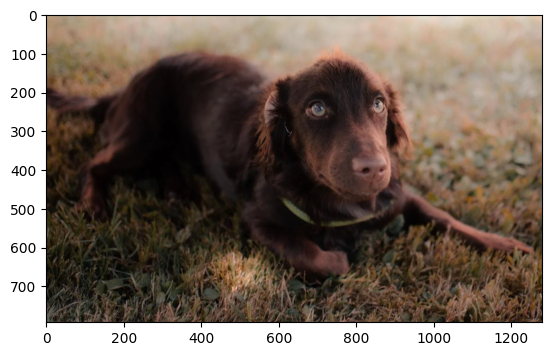

In [25]:
img_not_compressed = cv2.merge([red,green,blue])
#viewing the not compressed image
plt.imshow(img_not_compressed);

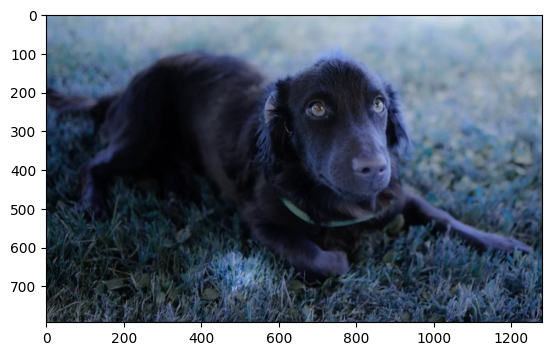

In [26]:
img_not_compressed = cv2.merge([blue, green, red])
#viewing the not compressed image
plt.imshow(img_not_compressed);

OpenCV will split into Blue, Green, and Red channels instead of Red, Blue, and Green. Be very careful of the sequence here.

In [27]:
# Initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (793, 20)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 20)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 20)
blue_inverted.shape: (793, 1280)


In the process of reconstructing the original dimensions from the reduced dimensions, some information is lost as we keep only selected principal components, 20 in this case.

In [28]:
img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

Stacking the inverted arrays using dstack function. Here it is important to specify the datatype of our arrays, as most images are of 8 bit. Each pixel is represented by one 8-bit byte.

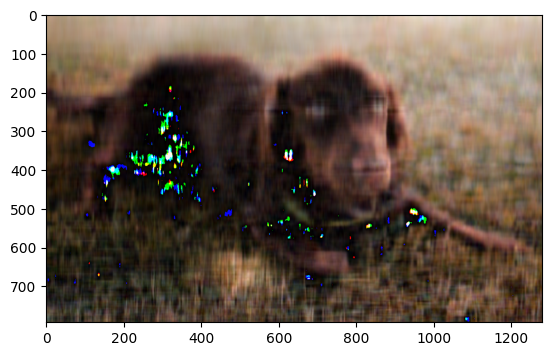

In [29]:
#viewing the compressed image
plt.imshow(img_compressed)
# plt.imsave('img\img_compressed.jpg', img_compressed);

The output above is what we get when considering just 20 Principal components. (Nota: lo hemos aplicado al largo, no a toda la imagen con reshape. Aún así la compresión ha sido muy alta: de 1280 a 20)

If we increase the number of Principal components the output image will get clear.

red_transformed.shape: (793, 200)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 200)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 200)
blue_inverted.shape: (793, 1280)


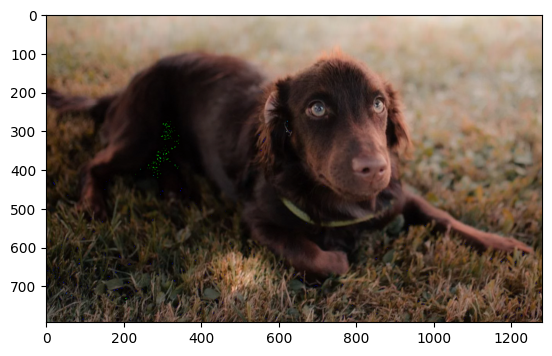

In [30]:
# Initialize PCA with first 20 principal components
pca = PCA(200)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

#viewing the compressed image
plt.imshow(img_compressed);

In [31]:
img_compressed.shape

(793, 1280, 3)

In [32]:
pca.explained_variance_ratio_.cumsum()

array([0.71914516, 0.84908078, 0.87286237, 0.88844408, 0.89865226,
       0.90765092, 0.91383793, 0.91975685, 0.9250571 , 0.9297264 ,
       0.933692  , 0.93751202, 0.94103888, 0.94404696, 0.94677529,
       0.94935898, 0.95170765, 0.95398267, 0.95603986, 0.9579354 ,
       0.95980251, 0.96157869, 0.96316876, 0.96467165, 0.96613913,
       0.96749861, 0.96879963, 0.97007384, 0.97123758, 0.97233711,
       0.97340584, 0.974405  , 0.97537922, 0.97628754, 0.97715436,
       0.97796994, 0.97875348, 0.97952903, 0.98026559, 0.98095624,
       0.98161481, 0.98224925, 0.98284966, 0.98343271, 0.98398928,
       0.98450207, 0.98499793, 0.98547484, 0.98593405, 0.98637935,
       0.9868111 , 0.98723624, 0.98763407, 0.98802932, 0.98839627,
       0.98875005, 0.98909782, 0.9894282 , 0.98973969, 0.99004701,
       0.99034098, 0.99062507, 0.9909028 , 0.99117515, 0.99143564,
       0.99168259, 0.99192426, 0.99215462, 0.99237763, 0.99259952,
       0.992815  , 0.99301592, 0.99320767, 0.9933938 , 0.99357